In [1]:
%%capture
!pip install factor_analyzer
!pip install yellowbrick
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot
from sklearn.decomposition import PCA
import umap


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/manul/OneDrive/Escritorio/Analytics/Projects/Country-data for PCA-Clustering.csv")
print("File was read!")

File was read!


In [4]:
from math import pi
def radar_plot(df):
    """Creates a radar plot using the cluster information in DataFrame"""
    min_val = df.min().min()
    max_val = df.max().max()
    df_plot = df.T
    # number of variable
    categories=df_plot.index.to_list()
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([min_val + (max_val-min_val)*per for per in [.25,.5,.75]],labels=[.25,.5,.75], color="grey", size=7)
    plt.ylim(min_val,max_val)

    # Plot each individual = each line of the data
    n_vars = len(df_plot.columns)
    line_colors = sns.color_palette("pastel", n_colors = n_vars)
    for i, cluster in enumerate(df_plot.columns):
        values = df_plot[cluster].to_list()
        values += values[:1]

        ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster, color = line_colors[i])
        ax.fill(angles, values, color = line_colors[i], alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [5]:
def get_cluster_sizes(kmeans):
    return pd.Series(kmeans.labels_).value_counts().sort_index()

def get_cluster_centers(kmeans, columns):
    return df_bathsoap_norm[columns].groupby(kmeans.labels_).mean()

def get_cluster_centers_original(kmeans, columns):
    return df_bathsoap[columns].groupby(kmeans.labels_).mean()

In [6]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.shape

(167, 10)

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Axes: >

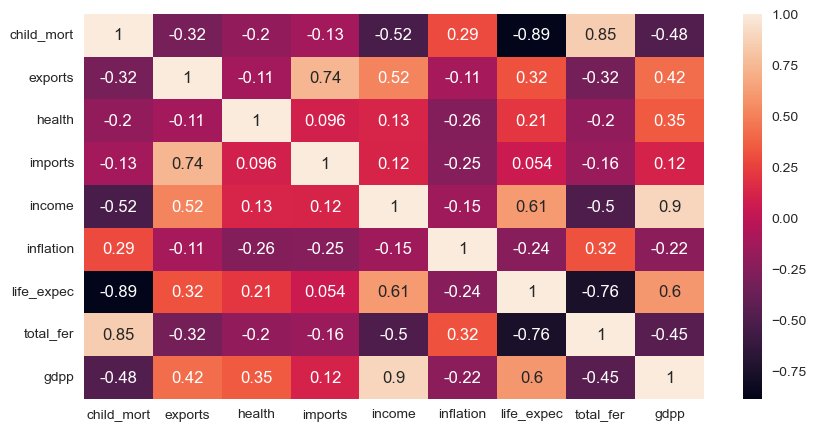

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [12]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Baseline clustering model - original data - KMeans

In [13]:
scaler = StandardScaler()

In [14]:
scaled_df = scaler.fit_transform(df.drop('country', axis = 1))

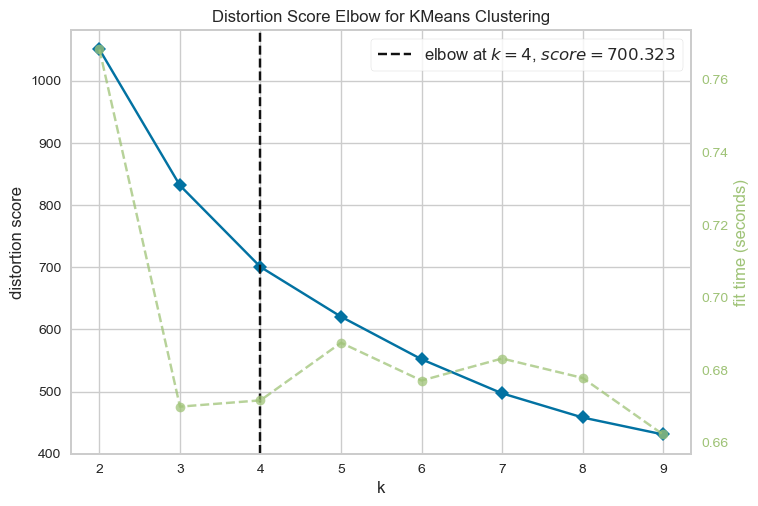

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(scaled_df)
visualizer.show() 

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42,init='k-means++')
kmeans_labels = kmeans.fit_predict(scaled_df)

centroids = kmeans.cluster_centers_

pd.Series(kmeans_labels).value_counts()

0    87
1    47
2    30
3     3
dtype: int64

In [17]:
silhouette_avg_original = silhouette_score(scaled_df, kmeans_labels)
calinski_score_original = calinski_harabasz_score(scaled_df, kmeans_labels)

print(f"Silhouette Score: {silhouette_avg_original}")
print(f"Calinski-Harabasz Score: {calinski_score_original}")

Silhouette Score: 0.301375962376881
Calinski-Harabasz Score: 62.27428937580995


In [18]:
original_clustered = pd.DataFrame(centroids, columns=df.columns.drop('country'))
original_clustered

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.419827,0.006648,-0.211724,0.047581,-0.217274,-0.034953,0.268420,-0.438222,-0.330805
1,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,-0.828609,0.172621,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681,1.661902
3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797


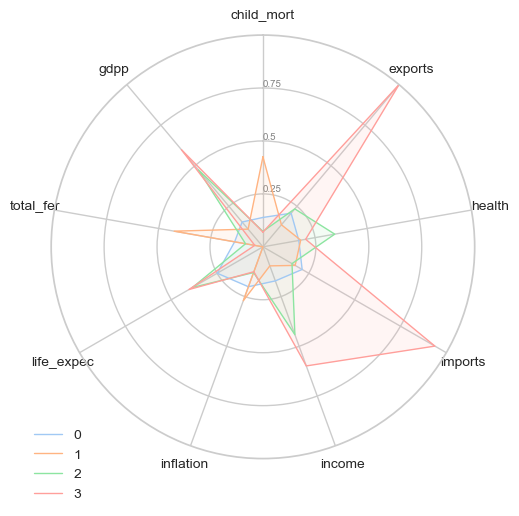

In [19]:
radar_plot(original_clustered)

#### -Cluster 1 seems to be underdeveloped countries
#### -Cluster 3 are the developed countries. However, we note that we only have 3 entries for this cluster, so these might be outliers. We will see these countries individually
#### - Clusters 0 and 2 are similar to each other, but they have some slight differences. Cluster 2 is doing better in terms of GDP per capita, income per person and life expectancy. However, it is doing worse than cluster 1 in terms of child mortality, inflation and is relatively more closed economy. We could say that both of them are mid-tier countries, but they differ in why they are considered mid-tier countries

In [20]:
original_cluster_assignments = kmeans.predict(scaled_df)

clusters_original = pd.DataFrame({'Cluster': original_cluster_assignments}).reset_index()

clusters_original['Country'] = df['country']
clusters_original = clusters_original.dropna().reset_index()
possible_outliers = clusters_original.loc[clusters_original['Cluster'] == 3, ['Cluster', 'Country']]
possible_outliers

,Cluster,Country
91,3,Luxembourg
98,3,Malta
133,3,Singapore


#### We know that these countries either have a very low territory or a very low population with a relatively big economy. We could consider these as outliers or lower the number of clusters to have these three included into the 'developed' cluster.

# Clustering model 2 - feature engineering - KMeans

#### -Trade balance superavit: if exports minus imports is > 0, then this variable takes the value of 1, 0 otherwise
#### -Health expenditure inefficiency: health divided by life expectancy to measure how effective is the government's attempt at improving health quality in the country. The lower the number the better
#### -Income disparity ratio: calculated as avg income per person over gdp per capita, it is a measure of inequality. If IDR > 1, money is concentrated in a small group of people, while if it is less than 1 then it is more evenly spread out

In [21]:
df1['trade_balance_superavit'] = df1['exports'] - df1['imports']
df1['trade_balance_superavit'] = df1['trade_balance_superavit'].apply(lambda x: 1 if x > 0 else 0)

df1['health_exp_inefficiency'] = df1['health'] / df1['life_expec']

df1['income_disparity_ratio'] = df1['income'] / df1['gdpp']

In [22]:
scaled_df1 = scaler.fit_transform(df1.drop('country', axis = 1))

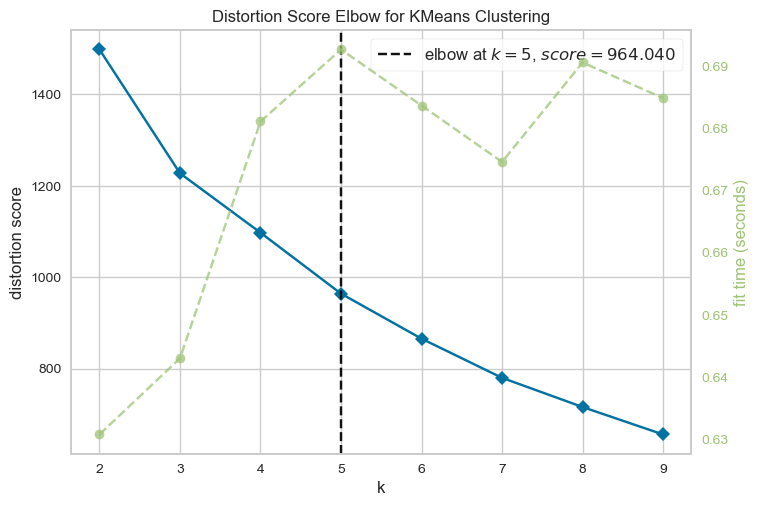

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(2,10), timings= True)
visualizer.fit(scaled_df1)
visualizer.show() 

In [24]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=5,random_state=42,init='k-means++')
kmeans_labels1 = kmeans1.fit_predict(scaled_df1)

In [25]:
centroids1 = kmeans1.cluster_centers_

pd.Series(kmeans_labels1).value_counts()

2    60
0    38
1    36
4    30
3     3
dtype: int64

In [26]:
silhouette_avg1 = silhouette_score(scaled_df1, kmeans_labels1)
calinski_score1 = calinski_harabasz_score(scaled_df1, kmeans_labels1)

print(f"Silhouette Score: {silhouette_avg1}")
print(f"Calinski-Harabasz Score: {calinski_score1}")

Silhouette Score: 0.2276561699470688
Calinski-Harabasz Score: 43.689416059105426


In [27]:
clustered1 = pd.DataFrame(centroids1, columns=df1.columns.drop('country'))
clustered1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,trade_balance_superavit,health_exp_inefficiency,income_disparity_ratio
0,0.239830,-0.188210,-0.873632,-0.619231,-0.290686,0.968833,-0.199498,0.226618,-0.432627,0.553077,-0.819230,0.880717
1,1.392949,-0.581074,0.221780,-0.013059,-0.761748,-0.032685,-1.430805,1.387930,-0.635737,-0.585530,0.799216,0.243846
2,-0.530824,0.125115,-0.020578,0.317070,-0.207109,-0.324238,0.374177,-0.543492,-0.287519,-0.377848,-0.153748,-0.044115
3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797,0.625947,-0.341055,-1.003442
4,-0.828775,0.191891,0.882438,-0.288915,1.452563,-0.489069,1.098626,-0.761694,1.641837,0.695175,0.420234,-1.219617


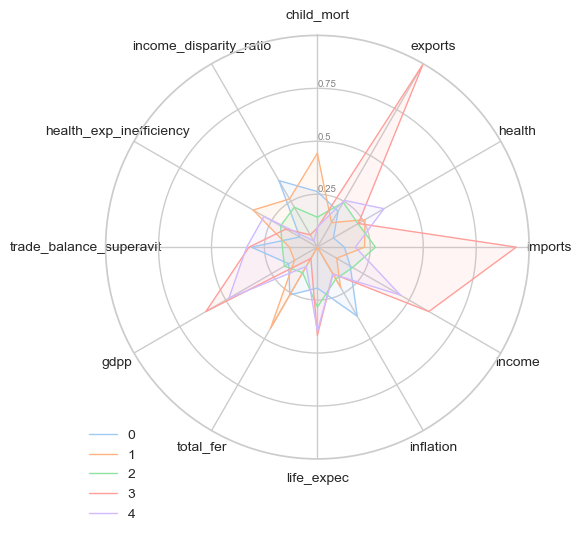

In [28]:
radar_plot(clustered1)

### -Clusters 0 and 1 are the countries that are doing relatively worst in terms of the other groups, yet they are slightly different. Cluster 0 is quite particular since it is not as bad as cluster 1 in most dimensions, however something interesting to note is that cluster 0 has a lot of income disparity. This means that income is concentrated among a specific group of people in comparison to the entire society. There is also more inflation on this cluster than in cluster 1 . If we consider every other dimension, then cluster 1 is doing worse than cluster 0 . 
#### -Clusters 2 and 4 are, again, similar in overall state but different in composition. Cluster 4 is composed of countries which have a trade balance superavit, meaning that they export more than what they import. This translates to an increased influx of money to the country which accelerates the economy and generates inflation. This sort of countries could potentially benefit from a more restrictive monetary polic, raising interest rates to put a halt to the accelerated economy. This cluster of countries does not invest a lot of their GDP in health, yet its life expectancy is, on average, good. Cluster 2 could be interpreted as the different side of the coin, but with similar results overall. This cluster is characterized by having a trade balance deficit, meaning that they import more than what they export. 
#### - Finally, we have the 'outliers' cluster, similarly to what we had in the previous model. Ideally we would like to remove the outliers or lower the number of clusters. However, I will actually leave this cluster for the second part of this project which relates to the economic analysis of the clusters.

In [29]:
cluster_assignments1 = kmeans1.predict(scaled_df1)

# Clustering model 3 - No feature engineering - PCA - KMeans

In [30]:
scaled_df2 = scaler.fit_transform(df2.drop('country', axis = 1)) 

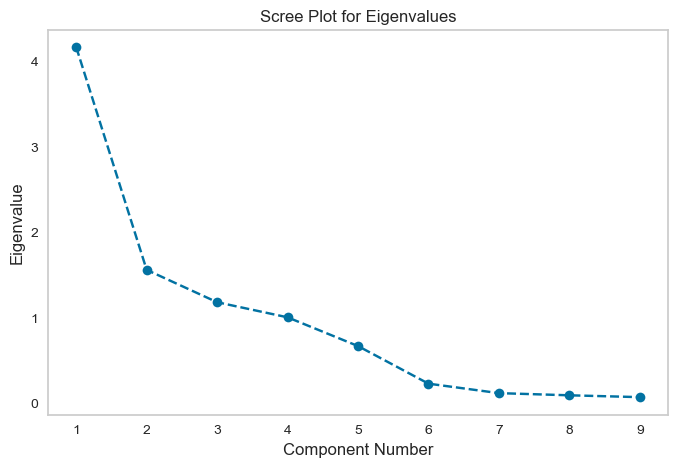

In [31]:
pca = PCA()

pca.fit(scaled_df2)

eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Eigenvalues')
plt.grid()
plt.show()

In [32]:
pca = PCA(n_components = 2)
pca.fit(scaled_df2)

PCA(n_components=2)

In [33]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=df2.drop('country', axis = 1).columns, index=[f'PC{i+1}' for i in range(len(loadings))])

loadings_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
PC2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022


#### We will only consider factor loadings which are > 0.3
#### -PC1 seems to be some sort of health demographic index
#### -PC2  looks to me as a measure of national economic activity

In [34]:
pca_result = pca.fit_transform(scaled_df2)

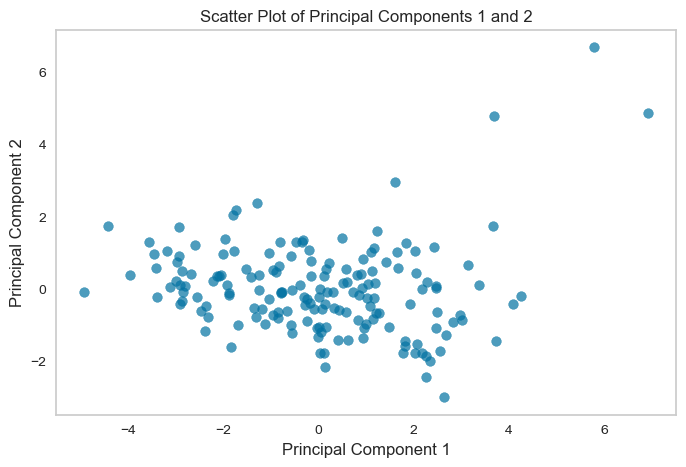

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.grid()
plt.show()

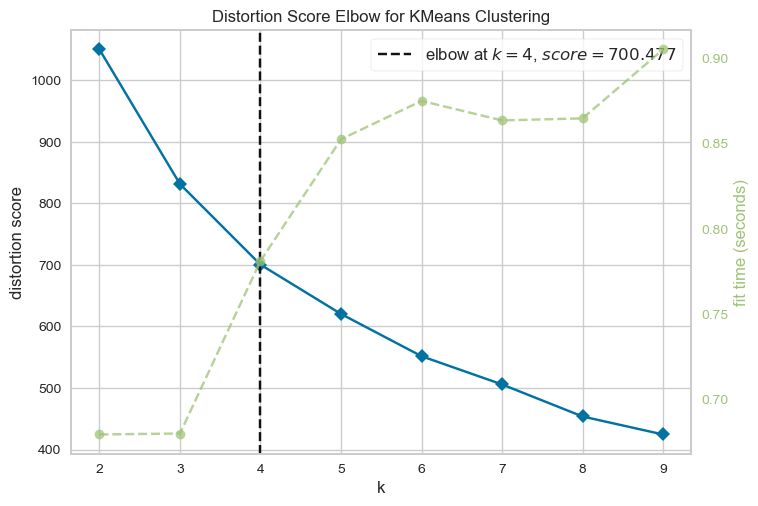

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(2,10), timings= True)
visualizer.fit(scaled_df2)
visualizer.show() 

In [37]:
kmeans2 = KMeans(n_clusters=4,random_state=42,init='k-means++')
kmeans_labels2 = kmeans2.fit_predict(scaled_df2)

centroids2 = kmeans2.cluster_centers_
centroids_pca = pca.transform(centroids2)
pd.Series(kmeans_labels2).value_counts()

0    87
1    47
2    30
3     3
dtype: int64

In [38]:
cluster_assignments2 = kmeans2.predict(scaled_df2)

In [39]:
silhouette_avg2 = silhouette_score(pca_result, cluster_assignments2)
calinski_score2 = calinski_harabasz_score(pca_result, cluster_assignments2)

print(f"Silhouette Score: {silhouette_avg2}")
print(f"Calinski-Harabasz Score: {calinski_score2}")

Silhouette Score: 0.3860964853632206
Calinski-Harabasz Score: 147.56632779101514


In [40]:
pca_cluster = pd.DataFrame(centroids_pca, columns = [['PCA1', 'PCA2']])
pca_cluster

,PCA1,PCA2
0,0.235279,-0.110651
1,-2.434620,0.411276
2,2.585905,-0.866690
3,5.460225,5.432473


In [41]:
clustered2 = pd.DataFrame(centroids2, columns=df2.columns.drop('country'))

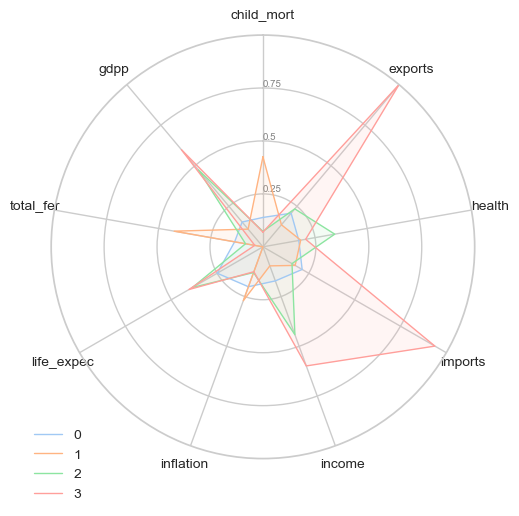

In [42]:
radar_plot(clustered2)

#### - Cluster 3 is, once again, the outliers cluster.
#### - Cluster 2 seems to be exceptionally well health-wise, but not so good on the economic side. These could be developing countries close to being developed
#### -Cluster 1 is the opposite of cluster 2 . It is doing very bad on the health index but relatively well on the economic side. Again, these are developing countries
#### -Cluster 0 is doing poorly on both health demographics, and especially on the economic side. These are under-developed countries

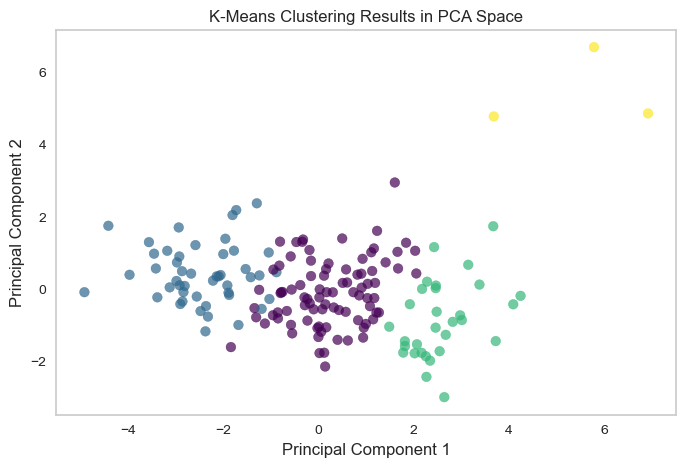

In [43]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels2, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results in PCA Space')
plt.grid()
plt.show()

#### Here we can much clearly see the three outliers (Malta, Luxenbourg and Singapore) as displayed by the upper right, yellow points in the scatter plot.

# Clustering model 4 - UMAP - DBScan

In [44]:
scaled_df3 = scaler.fit_transform(df3.drop('country', axis = 1)) 

In [45]:
umap_model = umap.UMAP(n_components=2)

umap_result = umap_model.fit_transform(scaled_df3)

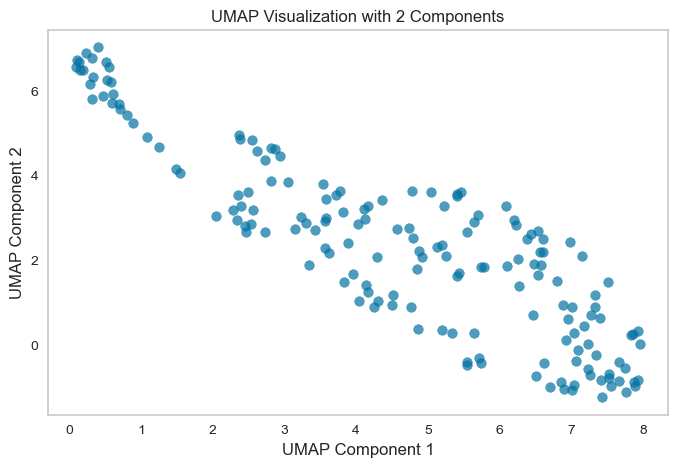

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.7)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization with 2 Components')
plt.grid()
plt.show()

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
dbscan = DBSCAN(eps=0.6, min_samples=3)
dbscan.fit(umap_result)

DBSCAN(eps=0.6, min_samples=3)

In [49]:
labels = dbscan.labels_

In [50]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

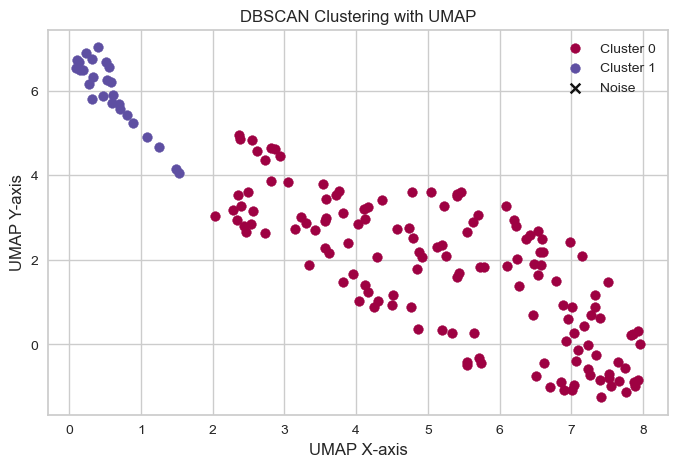

In [51]:
unique_labels = set(labels) - {-1}

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 5))

for label, color in zip(unique_labels, colors):
    cluster_points = umap_result[labels == label]
    
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}')

noise_points = umap_result[labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='k', marker='x', label='Noise')

plt.xlabel('UMAP X-axis')
plt.ylabel('UMAP Y-axis')
plt.title(f'DBSCAN Clustering with UMAP')
plt.legend()
plt.show()

In [52]:
clustered_data = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])  # Replace with your actual UMAP dimension column names
clustered_data['Cluster'] = labels

clustered_clusters = clustered_data[clustered_data['Cluster'] != -1].groupby('Cluster')

cluster_means = clustered_clusters.mean()

cluster_means.reset_index()

print(cluster_means)


            UMAP1    UMAP2
Cluster                   
0        5.314765  1.70153
1        0.570649  5.95049


# Final model selection: Feature engineered K-Means (Model 2) 

In [53]:
pd.Series(kmeans_labels1).value_counts()

2    60
0    38
1    36
4    30
3     3
dtype: int64

In [54]:
clustered1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,trade_balance_superavit,health_exp_inefficiency,income_disparity_ratio
0,0.239830,-0.188210,-0.873632,-0.619231,-0.290686,0.968833,-0.199498,0.226618,-0.432627,0.553077,-0.819230,0.880717
1,1.392949,-0.581074,0.221780,-0.013059,-0.761748,-0.032685,-1.430805,1.387930,-0.635737,-0.585530,0.799216,0.243846
2,-0.530824,0.125115,-0.020578,0.317070,-0.207109,-0.324238,0.374177,-0.543492,-0.287519,-0.377848,-0.153748,-0.044115
3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797,0.625947,-0.341055,-1.003442
4,-0.828775,0.191891,0.882438,-0.288915,1.452563,-0.489069,1.098626,-0.761694,1.641837,0.695175,0.420234,-1.219617


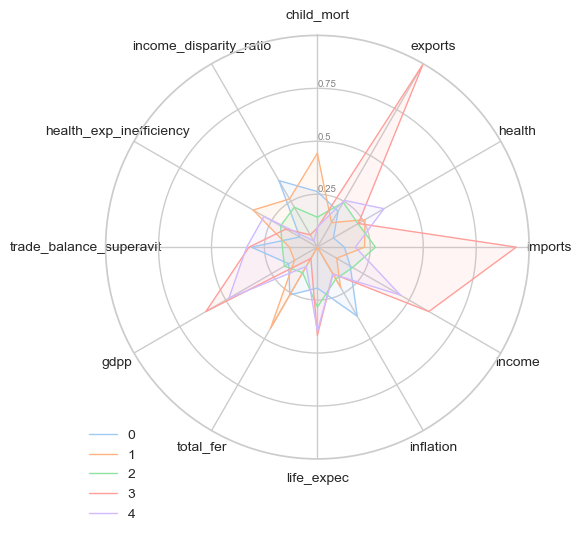

In [55]:
radar_plot(clustered1)

#### -Clusters 1 and 0 are the countries that are doing relatively worst in terms of the other groups, yet they are slightly different. Cluster 0 is quite particular since it is not as bad as cluster 1 in most dimensions, however something interesting to note is that cluster 0 has a lot of income disparity. This means that income is concentrated among a specific group of people in comparison to the entire society. There is also more inflation on this cluster than in cluster 1 . If we consider every other dimension, then cluster 1 is doing worse than cluster 0. 
#### Cluster 2 is the cluster which has more countries inside of it. We might consider cluster 2 as a sort of middle tier for countries on a global scale. This cluster is characterized by having the least spikes looking at the radar plot, so we could say that thanks to the vast amount of countries in this cluster the numbers are very averaged out/smoothed. Interestingly enough, it we look at the centroids table we notice that cluster two contains the median centroid for most of the dimensions.
#### -Cluster 4 is the group of countries which are more on the developed side, but not as developed as cluster 3 countries, which basically are the top 3 most developed countries in the world. cluster 4 countries are characterized for being the second best in most dimensions. One thing to notice about these countries is that they are exporters of goods and services and that their imports are very low. We could assume these countries have a sufficiently developed economy to produce goods and services themselves instead of buying them abroad. One thing (among other things) that might differ these countries from cluster 3 countries is that they are more inefficient in health expenditure. While the life expectancy of both clusters are similar, cluster 4 countries have way more expenditure in health than cluster 3 countries.
#### - Finally, cluster 3 represents the super developed countries. As we can see, they excel in most categories such as GDP per capita, income per person, life expectancy and has the lowest child_mortality, inflation and income disparity ratio. One interesting thing to see is that the total amount of children beared, on average, by women of these countries is the lowest, meaning that population growth might be negative. We could expect to see countries like Japan here.

In [56]:
clusters = pd.DataFrame({'Cluster': cluster_assignments1}).reset_index()

In [57]:
clusters['country'] = df['country']
clusters = clusters.dropna().reset_index()
clusters

,level_0,index,Cluster,country
0,0,0,1,Afghanistan
1,1,1,2,Albania
2,2,2,0,Algeria
3,3,3,0,Angola
4,4,4,2,Antigua and Barbuda
...,...,...,...,...
162,162,162,2,Vanuatu
163,163,163,0,Venezuela
164,164,164,2,Vietnam
165,165,165,0,Yemen


# Cluster ranking in terms of development

### Cluster 3: Super developed countries
### Cluster 4: Developed countries
### Cluster 2: Developing countries (middle ground)
### Clusters 0 and 1: Under-developed countries
##### Cluster 0: Economically underdeveloped
##### Cluster 1: Socially underdeveloped

In [58]:
cluster_0 = clusters.loc[clusters['Cluster'] == 0]
cluster_1 = clusters.loc[clusters['Cluster'] == 1]
cluster_2 = clusters.loc[clusters['Cluster'] == 2]
cluster_3 = clusters.loc[clusters['Cluster'] == 3]
cluster_4 = clusters.loc[clusters['Cluster'] == 4]

# Cluster 3 - Super developed countries/potential outliers

In [59]:
cluster_3

,level_0,index,Cluster,country
91,91,91,3,Luxembourg
98,98,98,3,Malta
133,133,133,3,Singapore


#### Based off of what we see initially from this cluster, we could consider these countries as outliers. These countries have very high income per person and GDP per capita mainly due to the fact that they have relatively low populations and are very limited in size. Lets have a look at their actual populations and total surface to see this with evidence

In [60]:
outliers = df[df['country'].isin(['Luxembourg', 'Malta', 'Singapore'])]
outliers['population'] = [660809,535497, 6024268]
outliers['size in km2'] = [2586,316,734.3]
outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,population,size in km2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,660809,2586.0
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,535497,316.0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,6024268,734.3


#### As we can see, these are countries which are relatively small in terms of population (except for Singapore, which could be even an outlier among the outliers given its tremendously big economy).

# Cluster 4 - Developed countries

### In order to analyze some aspects of this cluster, I would like to propose a hypothesis. Although we can see that these countries, on average, run a trade balance superavit, my hypothesis is that for these countries the commercial balance does not have a significant impact on inflation. The plan to do this is the following. First I will group the superavit-running countries on one group and the deficit-running countries on another one. I will then compute the average inflation numbers for both groups and see if there is a statistically significant difference among them.

In [61]:
cluster_4_countries = df[df['country'].isin(cluster_4['country'].unique())]
cluster_4_countries['trade_balance_superavit'] = cluster_4_countries['exports'] - cluster_4_countries['imports']
cluster_4_countries['trade_balance_superavit'] = cluster_4_countries['trade_balance_superavit'].apply(lambda x: 1 if x > 0 else 0)
superavit4 = cluster_4_countries[cluster_4_countries['trade_balance_superavit'] == 1]
deficit4 = cluster_4_countries[cluster_4_countries['trade_balance_superavit'] == 0]

In [62]:
deficit4.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,trade_balance_superavit
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,4.744444,24.333333,11.093333,27.633333,36577.777778,1.073889,80.833333,1.682222,38122.222222,0.0
std,1.153377,5.531727,2.743552,6.251200,6816.116522,0.810317,1.111306,0.268364,10116.543107,0.0
min,3.800000,12.400000,8.730000,15.800000,27200.000000,0.160000,78.700000,1.370000,22500.000000,0.0
25%,3.900000,22.100000,9.540000,26.800000,32500.000000,0.643000,80.300000,1.460000,30700.000000,0.0
50%,4.200000,25.500000,10.300000,28.100000,36200.000000,1.050000,81.300000,1.630000,38900.000000,0.0
75%,5.200000,28.200000,11.300000,30.800000,40700.000000,1.220000,81.700000,1.930000,47400.000000,0.0
max,7.300000,29.900000,17.900000,37.400000,49400.000000,2.870000,82.000000,2.030000,51900.000000,0.0


In [63]:
import scipy.stats as stats

group_1 = superavit4['inflation']
group_2 = deficit4['inflation']

t_statistic, p_value = stats.ttest_ind(group_1, group_2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in means.")
else:
    print("There is no statistically significant difference in means.")


t-statistic: 1.3011242440889514
p-value: 0.20382153102140077
There is no statistically significant difference in means.


### As we can see from the t-test performed above, there is no statistically significant difference in the average inflation numbers for each group. It must be emphasized that this assumption holds true only for countries within this cluster. Given this information, lets see if this assumption is still true for the entire database, or for the entire world.

In [64]:
superavit_world = df1[df1['trade_balance_superavit'] == 1]
deficit_world = df1[df1['trade_balance_superavit'] == 0]

In [65]:
import scipy.stats as stats

group_1 = superavit_world['inflation']
group_2 = deficit_world['inflation']

t_statistic, p_value = stats.ttest_ind(group_1, group_2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in means.")
else:
    print("There is no statistically significant difference in means.")

t-statistic: 2.4458123659698776
p-value: 0.015503003860698522
There is a statistically significant difference in means.


### Interestingly enough, the we find no statistical evidence to prove our initial hypothesis when we try to test the assumption for the entire dataset. This means that, in general, the trade balance could be a good indicator of the inflation of the country. However, when we look only at countries from cluster 4, then their inflation numbers are not so different between each other given their developed nature, therefore the trade balance is not a good proxy for inflation here.

# Cluster 2 - mid-tier/developing countries

### In order to have a visual representation of how distinct countries are amongst each other, lets plot a radar plot of 8 selected countries within this cluster. I will select countries from different geographical areas to have a more holistic view. The following countries will be selected:
#### Central America: Bahamas
#### South America: Uruguay
#### Northern Africa: Morocco
#### Central Africa: Cape Verde
#### Europe: Bulgaria
#### Middle East: Jordan
#### Southeast Asia: Cambodia
#### Pacific: Tonga

In [66]:
c2_select = df[df['country'].isin(['Bahamas', 'Uruguay', 'Morocco', 'Cape Verde', 'Bulgaria', 'Jordan', 'Cambodia', 'Tonga'])]

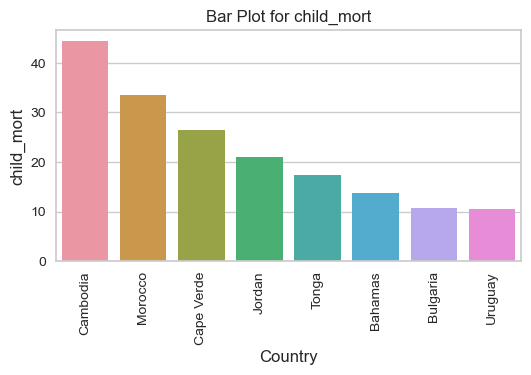

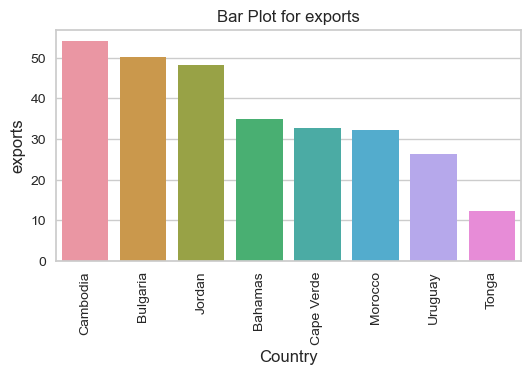

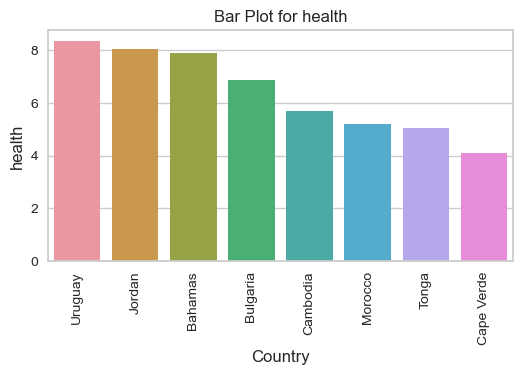

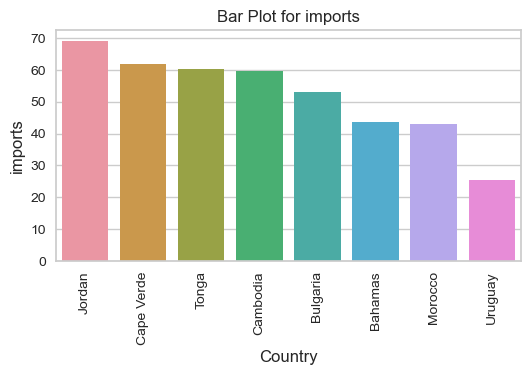

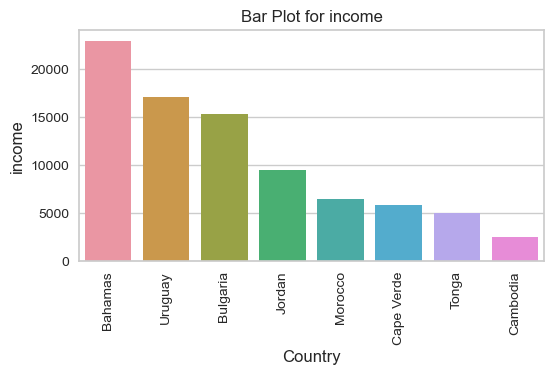

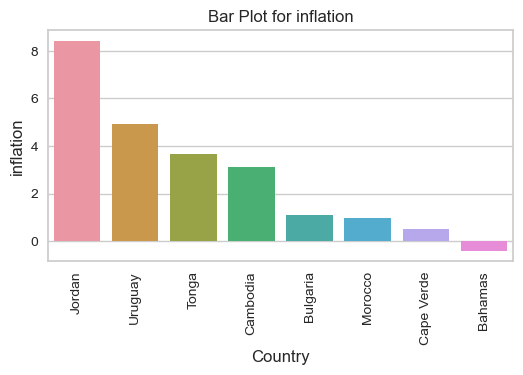

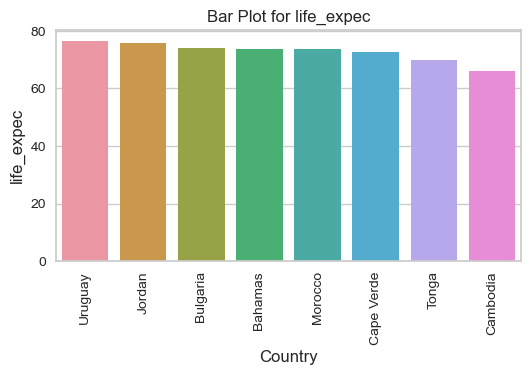

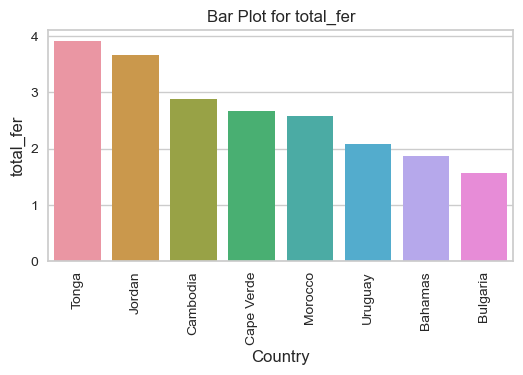

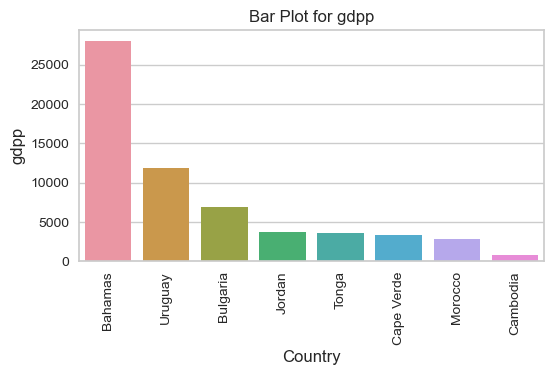

In [67]:
for col in c2_select.drop('country', axis=1).columns:
    plt.figure(figsize=(6, 3))
    
    sorted_data = c2_select.sort_values(by=col, ascending=False)
    
    sns.barplot(data=sorted_data, x='country', y=col)
    plt.xlabel('Country')
    plt.ylabel(col) 
    plt.title(f'Bar Plot for {col}')
    plt.xticks(rotation=90) 
    plt.show()

### What the graphs above tell us is why these countries are grouped into one single cluster: none of them excel both in the demographic and economic metrics at the same time. Lets have a look at some examples:
#### -Cambodia: Cambodia is probably the country that is overall doing the worst. Lowest life expectancy and highest child mortality for the demographic side. Also, they have the lowest income per person and GDP per capita. Their inflation is relatively controlled, which is a good thing.
#### - Uruguay: Doing quite well on the demographic side, and also doing well on the economic side. However, one thing to notice about Uruguayan economy is their relatively higher inflation. However, it is important to notice that actual inflation numbers in Uruguay represent their lowest since 2005, so we might see Uruguay in a different cluster if this trend continues.
#### - Morocco: Morocco is average across every dimension. 
#### - Bulgaria: Bulgaria is doing relatively well across the different dimensions. However, it is not doing well enough for it to earn a spot on cluster 4. Lets keep in mind though that Bulgaria's GDP per capita has been increasing since the beginning of the 21st century. 
#### - Tonga: The particular thing about Tonga is that, even having the highest fertility per mother, their child mortality rate is quite average. Something that we will probably see among under-developed countries is a strong positive correlation among fertility and child mortality numbers. However, this is not the case. Also, Tonga has a deficit in its trade balance. They have been running a trade deficit for over 50 years, which does not necessarily mean bad news.
#### - Cape Verde: This is one of the few African countries present on this cluster. They have a very nice inflation number, but also a relatively high child mortality. Cape Verde's GDP per capita has increased substantially in the decade of 2000-2010 due to consistent policies which led to an increase in Foreign Direct Investment.
#### - Jordan: Jordan has average income per person and GDP per capita numbers. Their health and demographic indicators are fairly good, having the second highest life expectancy and the second highest expenditure in health per capita. However, their inflation is very high (highest among this group).
#### - Bahamas: They are doing great in terms of GDP per capita and income per person. The only thing we have to keep in mind is that Bahamas is a very small country with a low population, so this might trick some people. Another interesting thing about Bahamas is that they have negative inflation, also known as deflation. Although this might seem like something positive for the economy, this may not necessarily be the case. Deflation might lead to a freezing in the economy as consumers tend to delay their purchases in the hopes of lower prices for the future. This also translates to lower wages as companies have less income, meaning higher unemployment.

# Cluster 0 - Under-developed countries - High inflation and income disparity

### We notice here that inflation is relatively high for these countries. Lets try out the same test we did for cluster 4 on trade balance and inflation

In [68]:
cluster_0_countries = df[df['country'].isin(cluster_0['country'].unique())]
cluster_0_countries['trade_balance_superavit'] = cluster_0_countries['exports'] - cluster_0_countries['imports']
cluster_0_countries['trade_balance_superavit'] = cluster_0_countries['trade_balance_superavit'].apply(lambda x: 1 if x > 0 else 0)
superavit0 = cluster_0_countries[cluster_0_countries['trade_balance_superavit'] == 1]
deficit0 = cluster_0_countries[cluster_0_countries['trade_balance_superavit'] == 0]

In [69]:
group_1 = superavit0['inflation']
group_2 = deficit0['inflation']

t_statistic, p_value = stats.ttest_ind(group_1, group_2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in means.")
else:
    print("There is no statistically significant difference in means.")


t-statistic: 0.9840097393723891
p-value: 0.33167816750825196
There is no statistically significant difference in means.


### Once again we see that for this cluster there is no evidence to state that trade balance deficit/superavit is a good proxy for inflation. This could make sense since the centroid for inflation for this country is the only one that takes a positive value among all clusters. This means that this cluster is, in fact, mostly composed of inflationary countries. If this is the case then we might not see a lot of difference in inflations among countries of this cluster. Further analysis should be performed to identify the root causes of inflation for the countries in this cluster. We might even find that the causes for inflation on each country differ.

# Cluster 1- under-developed countries - fewest resources available

In [70]:
df_with_cluster = pd.merge(df1, clusters, on='country', how='left')
cluster_1_econ_metrics = df_with_cluster.loc[df_with_cluster['Cluster'] == 1, ['country','gdpp','inflation', 'income']]

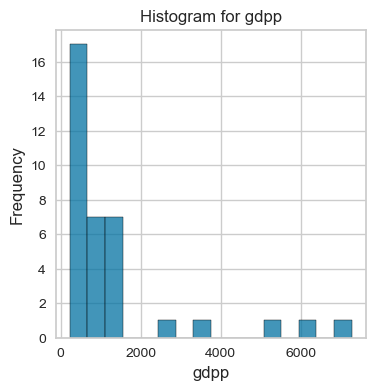

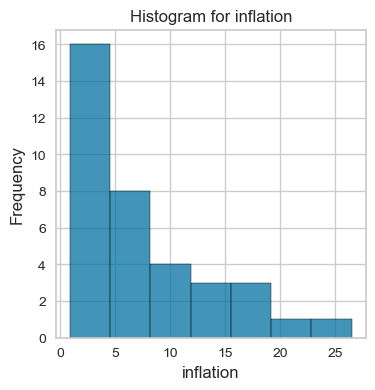

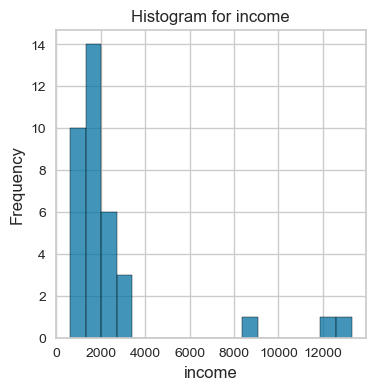

In [71]:
for col in cluster_1_econ_metrics.drop('country', axis=1).columns:
    plt.figure(figsize=(4, 4))  
    sns.histplot(data=cluster_1_econ_metrics, x=col)
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Histogram for {col}')
    plt.show()

### Right off the bat we can notice that about 85% of the countries in this cluster are from the same continent, which is Africa. These are the countries that most desperately need economical aid. If we compare this cluster to cluster 0, what we can see is that there is much less income disparity in cluster 1. What this tells us is that cluster 0 does have more resources than cluster 1, however they are inadequately distributed. On the other hand, cluster 1's resources are more evenly distributed, but the problem is that there are not many resources at all. This can be seen from the histogram plots done above. The median value for GDP per capita for this cluster is 705 (3865 less than the world median value), while the median income value per person is 1695 (8265 less than the world median value).

# Economic Aid

### Lets assume that we are analysts working for an international aid organization and have been assigned to a project where we have to propose economic aid schemes for each country in the world. We do not know the total amount of the budget, so we can assume percentages for distribution purposes. After performing our clustering these are the amounts that we have come up with.

In [72]:
aid = pd.DataFrame({'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                   'Category': ['Under-developed', 'Under-developed', 'Mid-Tier', 'Super-developed', 'Developed'],
                  'Description': ['Some resouces available, high income disparity', 'Fewest resources available', 'Resources available', 'Outliers', 'Lots of resources and good distribution'],
                  'Economic aid provided': ['30%', '70%', 'No aid needed', 'No aid needed', 'No aid needed']})
aid

,Cluster,Category,Description,Economic aid provided
0,Cluster 0,Under-developed,"Some resouces available, high income disparity",30%
1,Cluster 1,Under-developed,Fewest resources available,70%
2,Cluster 2,Mid-Tier,Resources available,No aid needed
3,Cluster 3,Super-developed,Outliers,No aid needed
4,Cluster 4,Developed,Lots of resources and good distribution,No aid needed
